In [1]:
import pandas as pd
import numpy as np
from itertools import chain

In [2]:
gpt_posts = pd.read_csv("../data/raw/so_tag_gpt.csv")
chat_gpt_posts = pd.read_csv("../data/raw/so_tag_chatgpt.csv")

In [3]:
so_posts = pd.concat([gpt_posts, chat_gpt_posts], ignore_index=False)
so_posts = so_posts.drop_duplicates(subset='Post Link', keep='first')

In [4]:
so_posts['Tags'] = so_posts['Tags'].astype(str)

In [5]:
so_posts

,Post Link,PostTypeId,OwnerUserId,Answer Link,Title,Body,CreationDate,ClosedDate,LastEditDate,LastActivityDate,...,CommentCount,Score,ViewCount,FavoriteCount,PostTypeId.1,OwnerUserId.1,Body.1,CreationDate.1,CommentCount.1,Score.1
0,75801940,1,19336351.0,NaN,Unable to get word by word response from GPT API,<p>I am trying to get the response from my gpt...,2023-03-21 13:36:31,NaN,NaN,2023-03-25 17:14:24,...,0,0,293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75807326,1,9050016.0,NaN,How to prepare dataset with multiple answers f...,"<p>I am trying to fine-tune the GPT model, and...",2023-03-21 23:50:31,NaN,2023-03-21 23:55:13,2023-03-22 09:56:29,...,0,0,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75807664,1,3944252.0,NaN,Issues Handling ChatGPT Streaming Response in ...,<p>I am trying to integrate the <strong>openAi...,2023-03-22 01:09:17,NaN,NaN,2023-03-22 02:19:56,...,0,-2,1292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75811293,1,21455152.0,NaN,"OpenAI GPT-3 API error: ""InvalidRequestError: ...",<p>I've been trying to upload a json file that...,2023-03-22 10:51:16,NaN,2023-03-23 17:41:44,2023-03-23 17:50:39,...,0,-1,2093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75818642,1,19977480.0,NaN,"Finetuning gpt2, validation loss increases wit...",<p>I am finetuning gpt2 on text classification...,2023-03-23 01:48:21,NaN,NaN,2023-03-23 01:48:21,...,0,0,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,76067104,1,1492337.0,76074046.0,Using Vicuna + langchain + llama_index for cre...,<p>I want to create a self hosted LLM model th...,2023-04-20 18:14:37,NaN,NaN,2023-06-05 16:05:24,...,0,6,4826,NaN,2.0,9409701.0,"<p>length is too long, 9999 will consume huge ...",2023-04-21 14:17:09,1.0,3.0
254,76240871,1,20293888.0,76257734.0,How do i add memory to RetrievalQA.from_chain_...,<p>How do i add memory to RetrievalQA.from_cha...,2023-05-13 02:43:50,NaN,NaN,2023-06-11 06:14:14,...,0,4,2645,NaN,2.0,2799941.0,<p>Here's a solution with <code>Conversational...,2023-05-15 20:31:07,1.0,1.0
255,75724406,1,14301369.0,75724477.0,OpenAI API 404 response,"<p>I'm trying to use ChatGPT for my <a href=""h...",2023-03-13 16:17:07,NaN,2023-04-03 09:26:40,2023-06-02 22:36:57,...,1,5,3657,NaN,2.0,11692562.0,<p>Try to use <code>createChatCompletion</code...,2023-03-13 16:24:00,0.0,12.0
256,76030084,1,772481.0,76030158.0,ChatGPT completion /v1/chat/completions memori...,<p>When I use <code>user</code> parameter on <...,2023-04-16 20:07:27,NaN,2023-04-17 00:29:15,2023-04-17 00:29:15,...,0,0,1039,NaN,2.0,13269702.0,<p>Do you mean that previous messages are dele...,2023-04-16 20:27:19,3.0,2.0


In [6]:
def clean_tags(s):
    s=str(s)
    n=len(s)
    ls=[]
    for i in range(0,n):
        if s[i]=='<':
            for j in range(i+1,n):
                if s[j]=='>':
                    ls.append(s[i+1:j])
                    i=j+1
                    break
    s=" "
    s=s.join(ls)
    return s

tag=lambda s:clean_tags(s)
so_posts['Tags']=pd.DataFrame(so_posts.Tags.apply(tag))

In [7]:
so_posts['Tags']

0           node.js reactjs openai-api gpt-3 chatgpt-api
1      python nlp data-mining gpt-3 large-language-model
2                           python openai-api rich gpt-4
3                                python openai-api gpt-3
4      text-classification gpt-2 overfitting-underfit...
                             ...                        
253    python machine-learning pytorch chatgpt-api la...
254    python openai-api chatgpt-api langchain py-lan...
255    javascript node.js telegram-bot openai-api cha...
256                               openai-api chatgpt-api
257                               openai-api chatgpt-api
Name: Tags, Length: 687, dtype: object

In [8]:
so_posts['Tags'] = so_posts['Tags'].apply(lambda x: x.split())

In [9]:
all_tags = [item for sublist in so_posts['Tags'].values for item in sublist]

In [10]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

334

In [11]:
import nltk
flat_list = [item for sublist in so_posts['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(len(unique_tags))
tags_features = [word[0] for word in frequencies_words]

In [12]:
keywords

FreqDist({'openai-api': 370, 'gpt-3': 261, 'chatgpt-api': 258, 'python': 228, 'gpt-2': 182, 'nlp': 86, 'huggingface-transformers': 86, 'pytorch': 43, 'langchain': 39, 'tensorflow': 38, ...})

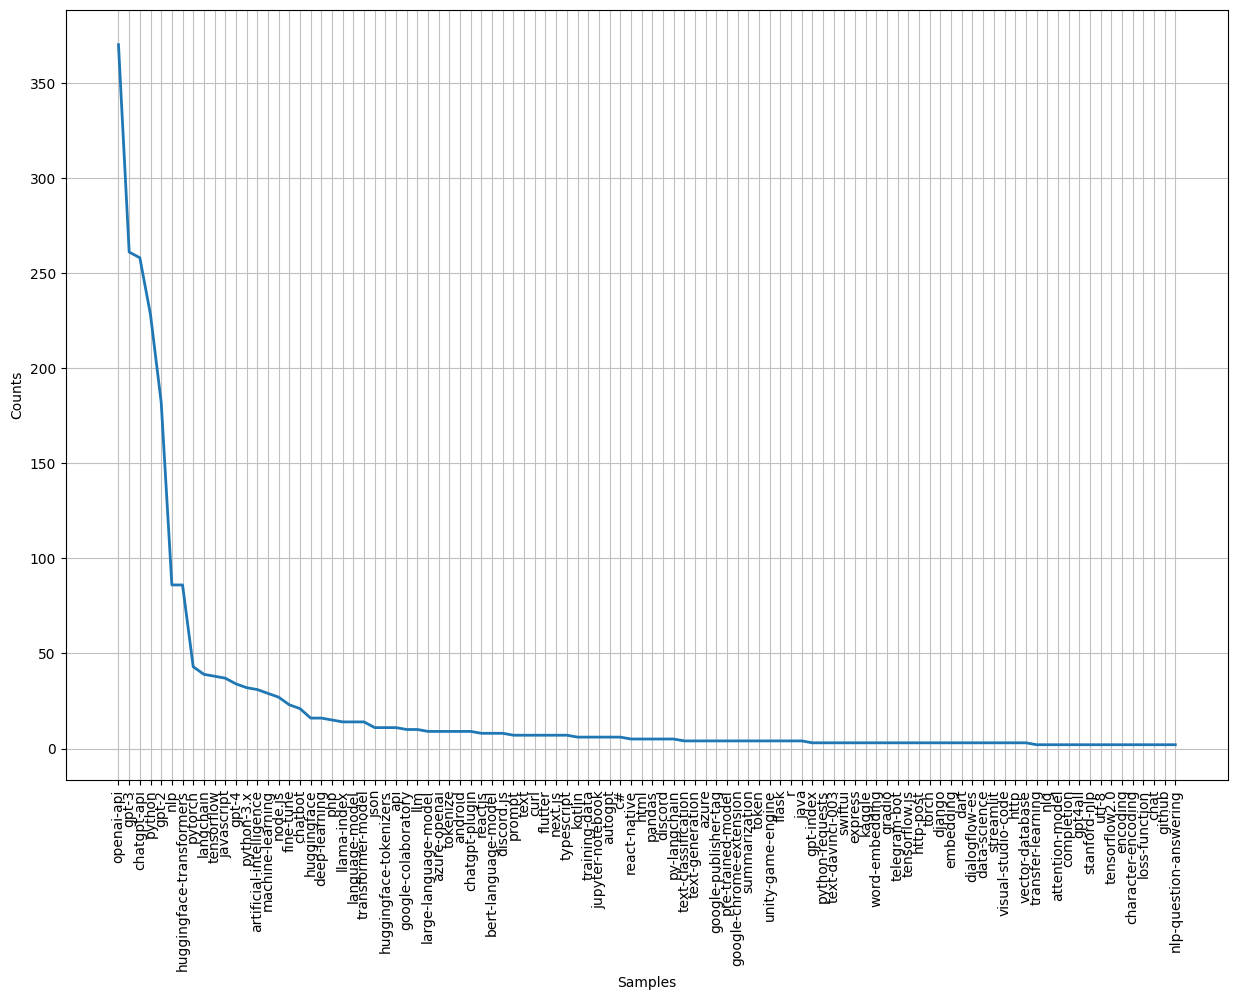

<Axes: xlabel='Samples', ylabel='Counts'>

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [14]:
frequencies_words

[('openai-api', 370),
 ('gpt-3', 261),
 ('chatgpt-api', 258),
 ('python', 228),
 ('gpt-2', 182),
 ('nlp', 86),
 ('huggingface-transformers', 86),
 ('pytorch', 43),
 ('langchain', 39),
 ('tensorflow', 38),
 ('javascript', 37),
 ('gpt-4', 34),
 ('python-3.x', 32),
 ('artificial-intelligence', 31),
 ('machine-learning', 29),
 ('node.js', 27),
 ('fine-tune', 23),
 ('chatbot', 21),
 ('huggingface', 16),
 ('deep-learning', 16),
 ('php', 15),
 ('llama-index', 14),
 ('language-model', 14),
 ('transformer-model', 14),
 ('json', 11),
 ('huggingface-tokenizers', 11),
 ('api', 11),
 ('google-colaboratory', 10),
 ('llm', 10),
 ('large-language-model', 9),
 ('azure-openai', 9),
 ('tokenize', 9),
 ('android', 9),
 ('chatgpt-plugin', 9),
 ('reactjs', 8),
 ('bert-language-model', 8),
 ('discord.js', 8),
 ('prompt', 7),
 ('text', 7),
 ('curl', 7),
 ('flutter', 7),
 ('next.js', 7),
 ('typescript', 7),
 ('kotlin', 6),
 ('training-data', 6),
 ('jupyter-notebook', 6),
 ('autogpt', 6),
 ('c#', 6),
 ('react-n

In [15]:
df_freq_words = pd.DataFrame(frequencies_words, columns =['Tag', 'Frequency'])
df_freq_words.to_csv("../data/cleaned/freq_words.csv")